# Comma police

One of the most widespread data storage format is the _comma separated value_ (csv) format.  
The csv are tabular data: they are made of rows and columns. For the csv files to be good csv files, every rows must have the same number of columns; and conversely every column must have the same number of rows (yes, just as a good dataframe).  
In general, though, there's nothing more than that: rows can be variable or observations, depending on who wrote the file.  
The name _csv_ is given by the fact that each _value_ in a row is separated by a comma. And rows of value are separated by a break line.

Comma separated value files are _plain text_ files: that means that you can open them with a simple text editor and see (and eventually, but don't do it!, edit) what's inside.

In this lab we have one example here named "addresses.csv". You can open it in Jupyter Lab by double clicking on it. **Try that!**

#### Question: what does it happen if you pick (in the Jupyter Lab viewer) a different delimeter?

> your answer here.

Indeed, csv files are a particular example of a wider class of files, where values are separated by _some_ delimiter. Common ones are tab delimited files, often shortened to _.tsv_.

## Before we start

If you want to read more about tidy data, and wide and long data, Hadley's book _Advanced R_ is THE place (he wrote the original paper). The relevant chapter is this one: http://r4ds.had.co.nz/tidy-data.html. Before the next lecture, to refresh about join operators, see this chapter: http://r4ds.had.co.nz/relational-data.html.

### Into R

As almost always in this course, we are going to use the tidyverse!

In [7]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


To read in a csv file, there's a dedicated function: `read_csv()`. Its output is a dataframe. Let's see, and **do read the red messages**.

### NOTICE we are using read_csv, not read.csv, that is underscore ("\_") not dot ("\.").

In [ ]:
addresses <- read_csv(file = "addresses.csv") 

addresses

Well, it looks quite the same thing we have seen opening the file with Jupyter Lab.  
So, what about that first row? It does not really look it's the name of variable, the _header_, rather just on row in the dataframe.  
We can tell `read_csv()` that the first row is just like the other setting the argument `col_names` to false.

In [ ]:
addresses <- "addresses.csv" %>%
              read_csv(col_names = FALSE) 

addresses

That's better: all the rows of data are in the dataframe. But the name of the variable are really not informative.

Sometimes you can read the names from a _data dictionary_ (a text file where the authors present the data, the way it is collected, the meaning of each variable). Sometimes you need to "invent" them for yourself.

In [ ]:
names_variables <- c("first_name", "family_name", "street_address", "town", "state", "zip_code")

addresses <-  "addresses.csv" %>%
               read_csv(col_names = names_variables) 

addresses

Try again giving different names.

In [ ]:
# your code here.

### Col types

Not all columns are the same stuff. Just by looking at the code, what do you expect the type of the data for each column to be?

> your answer here.

Now compare your previous answer with the type of the data in the columns that you can discover using, for example, `glimpse()`.

In [ ]:
# your code here.

Is it the same?

> your answer here.

Well, there was one column which may have confused you: the zip code. Those looks like numbers, integers to be specific.  

Yet some of them have zeros in front of the other digits. For an integer, that should not be a big problem, we can understand how to read the following number:

In [ ]:
0019

Yet, `readr` is more careful. Instead of risking an error forcing stuff to be a number when it was not, it parses `0019` as _characters_:

In [ ]:
"0019"

We can have a preview of what kind of object `read_csv()` will produce by using `guess_parser()`. Consider the following examples.

In [8]:
"0019" %>% guess_parser()
"19" %>% guess_parser()
"1.9" %>% guess_parser()
"1,9" %>% guess_parser()
"1900-03-01" %>% guess_parser()
"1900-33-33" %>% guess_parser()

[1] "character"

[1] "double"

[1] "double"

[1] "number"

[1] "date"

[1] "date"

`readr` tries to guess the type of the values it reads in a file, but he does not ALWAYS get it right. Moreover, it does not guess after having read _all_ the rows (that would be inefficient). It reads only a certain number of them, and then guesses and reads the other rows hoping that they are of the same type.

To be rigorous: it guesses the _schema_ (do you remember from the first lecture?) and then uses it to read efficiently the csv. `read_csv()` can read stuff from a file on your hard drive or from the web. It can even read compressed (zipped) files without any trouble (if they are in good shape). In general, if something is not *surely* of some other kind, it gets parsed as character.

In [9]:
url_enterprise_survey <- "https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2017-financial-year-provisional/Download-data/annual-enterprise-survey-2017-financial-year-provisional-csv.csv"

enterprise_survey <- read_csv(url_enterprise_survey)

Parsed with column specification:
cols(
  Year = col_double(),
  Industry_aggregation_NZSIOC = col_character(),
  Industry_code_NZSIOC = col_character(),
  Industry_name_NZSIOC = col_character(),
  Units = col_character(),
  Variable_code = col_character(),
  Variable_name = col_character(),
  Variable_category = col_character(),
  Value = col_character(),
  Industry_code_ANZSIC06 = col_character()
)


In [10]:
enterprise_survey %>% sample_n(5)

Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2013,Level 4,CC531,Polymer Product and Rubber Product Manufacturing,Dollars (millions),H21,Opening stocks,Financial performance,509,ANZSIC06 groups C191 and C192
2017,Level 3,AA21,Forestry and Logging,Dollars (millions),H11,Depreciation,Financial performance,156,ANZSIC06 group A030
2013,Level 3,CC71,Primary Metal and Metal Product Manufacturing,Dollars (millions),H24,Total assets,Financial position,2940,"ANZSIC06 groups C211, C212, C213, and C214"
2017,Level 4,FF115,Other Goods Wholesaling,Dollars,H34,Total income per employee count,Financial ratios,633900,"ANZSIC06 groups F371, F372, and F373"
2013,Level 3,II11,Road Transport,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,71,ANZSIC06 groups I461 and I462


### Your turn

Read something from the stats nz website:  https://www.stats.govt.nz/large-datasets/csv-files-for-download

In [ ]:
# your code here.

## When things go bad

Yet, this can go wrong sometimes. In the two following examples we will encouter some issue and work out if we can safely ignore them or we need to correct them. Remember, the decision depends on what data you are working on and for what purpose.  
Somebody else working on our examples may come to a different conclusion.

### Example 1

Let's try with a big and wild csv from https://www.stats.govt.nz/large-datasets/csv-files-for-download/:

`Overseas trade index: March 2019 quarter (provisional) – CSV.`

Refer to the website to discover the meaning of the variables!

In [11]:
Overseas_ti <- "https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv"

Overseas_ti <- Overseas_ti %>% read_csv()

Parsed with column specification:
cols(
  Series_reference = col_character(),
  Period = col_double(),
  Data_value = col_double(),
  STATUS = col_character(),
  UNITS = col_character(),
  MAGNTUDE = col_double(),
  Subject = col_character(),
  Group = col_character(),
  Series_title_1 = col_character(),
  Series_title_2 = col_character(),
  Series_title_3 = col_character(),
  Series_title_4 = col_logical(),
  Series_title_5 = col_logical()
)
Warning message:
“15866 parsing failures.
  row            col           expected              actual                                                                                                                                                                                                                                    file
29956 Series_title_4 1/0/T/F/TRUE/FALSE Seasonally adjusted 'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Do

That's a lot of red in the screen!  
We have 158666 parsing failures.  Not bad.  
Let's try to understand what's going on. We are suggested us to use `problems()` for more details. Let's do it.

In [12]:
Overseas_ti %>%
  problems() %>%
  head(10)

row,col,expected,actual,file
<int>,<chr>,<chr>,<chr>,<chr>
29956,Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv'
29957,Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv'
29958,Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv'
29959,Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv'
29960,Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv'
29961,Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv'
29962,Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv'
29963,Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv'
29964,Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,'https://www.stats.govt.nz/assets/Uploads/Overseas-trade-indexes-prices-and-volumes/Overseas-trade-indexes-prices-and-volumes-March-2019-quarter-provisional/Download-data/overseas-trade-index-march-2019-quarter-provisional-csv.csv'


At row 29956 and following `read_csv()` was expecting `1/0/T/F/TRUE/FALSE`, and if we look at the parsing information when we read, the last two columns are parsed as `Logical`. But what has it got? That look like a character?

Notice, at this point we may want to observe some value around the problem. However, if you did take a look at the two suspected columns, they are empty. We would need to look at the original file! You can do that in different way, one is by going back to the terminal and use `cat` `head` and `tail`.

Two columns are completely empty. Area all the errors the same kind?

In [13]:
Overseas_ti %>% 
  problems() %>%
  group_by(col,expected,actual) %>%
  tally()

col,expected,actual,n
<chr>,<chr>,<chr>,<int>
Series_title_4,1/0/T/F/TRUE/FALSE,Percentage change from previous period,496
Series_title_4,1/0/T/F/TRUE/FALSE,Percentage change from same period previous year,490
Series_title_4,1/0/T/F/TRUE/FALSE,Seasonally adjusted,7280
Series_title_4,1/0/T/F/TRUE/FALSE,Trend,7368
Series_title_5,1/0/T/F/TRUE/FALSE,Percentage change from previous period,232


The involved column is always the same, the actual value is 58 times "e3" and one time "e4". You can use `vis_miss()` from `vis_dat` to get a grip of how the missings are distributed. (or you can install the package `nianar` and use one of its functions to plot the distribution of the missing values.

In [ ]:
# your code here

#### Hard Time Reflection

You have (at least) three choices. Which one would you pick? Discuss and implement. 
1. drop the columns completely
2. use them with NAs inside
3. change the parsing of the column

In [ ]:
# your code here

### Example 2

Some other time you need to specify the type of the column by your self! We see that with an example from `readr`.

We are going to use the csv "challenge.csv", that is in this folder. First, open it with Jupyter Lab and give it a look. Then, we read it in R.

In [16]:
challenge <- "challenge.csv" %>%
              read_csv()

Parsed with column specification:
cols(
  x = col_double(),
  y = col_logical()
)
Warning message:
“1000 parsing failures.
 row col           expected     actual            file
1001   y 1/0/T/F/TRUE/FALSE 2015-01-16 'challenge.csv'
1002   y 1/0/T/F/TRUE/FALSE 2018-05-18 'challenge.csv'
1003   y 1/0/T/F/TRUE/FALSE 2015-09-05 'challenge.csv'
1004   y 1/0/T/F/TRUE/FALSE 2012-11-28 'challenge.csv'
1005   y 1/0/T/F/TRUE/FALSE 2020-01-13 'challenge.csv'
.... ... .................. .......... ...............
See problems(...) for more details.
”

A lot of read. And a familiar error. Let's give a look to the problems.

In [15]:
challenge %>%
  problems() %>%
  head()

row,col,expected,actual,file
<int>,<chr>,<chr>,<chr>,<chr>
1001,y,1/0/T/F/TRUE/FALSE,2015-01-16,'challenge.csv'
1002,y,1/0/T/F/TRUE/FALSE,2018-05-18,'challenge.csv'
1003,y,1/0/T/F/TRUE/FALSE,2015-09-05,'challenge.csv'
1004,y,1/0/T/F/TRUE/FALSE,2012-11-28,'challenge.csv'
1005,y,1/0/T/F/TRUE/FALSE,2020-01-13,'challenge.csv'
1006,y,1/0/T/F/TRUE/FALSE,2016-04-17,'challenge.csv'


Trouble seems to start at row 1001. We can ask `read_csv()` to read only a bunch of lines, not all of them, and see how it goes.

In [17]:
"challenge.csv" %>%
  read_csv(n_max = 1000) # we read only the first 1000

Parsed with column specification:
cols(
  x = col_double(),
  y = col_logical()
)


x,y
<dbl>,<lgl>
404,NA
4172,NA
3004,NA
787,NA
37,NA
2332,NA
2489,NA
1449,NA
3665,NA


Similarly, we can skip the first 1000 rows and read from the rest:

In [18]:
"challenge.csv" %>%
  read_csv(skip = 1001, # we skip the first 1000
  col_names = c("x", "y")) # now we have to specify the name of the columns as we have skip over the title row

Parsed with column specification:
cols(
  x = col_double(),
  y = col_date(format = "")
)


x,y
<dbl>,<date>
0.2383798,2015-01-16
0.4116800,2018-05-18
0.7460717,2015-09-05
0.7234506,2012-11-28
0.6145241,2020-01-13
0.4739806,2016-04-17
0.5784610,2011-05-14
0.2415937,2020-07-18
0.1143787,2011-04-30


The first entries of the variable `x` before row 1001 seem to be integer. But then (see the `actual` column in challenge's problems) it changes. In fact, `read_csv()` reads the first 1000 rows and then guess the type of the columns. In this case, the type changes after that.

We can solve this in two ways: by specifying the type of the columns or by asking `read_csv()` to read more rows before guessing.

We start with the latter. Go back an read the message that you got from `read_csv`, in particular the "Parsed with column specification" bit. That's the attempt done by `read_csv()`:

```
cols(
  x = col_integer(),
  y = col_character()
)
```

You can copy and tweak it: change integer to double.

In [33]:
challenge <- "challenge.csv" %>%
  read_csv(col_types = cols(
      x = col_double(), # change this to col_double
      y = col_character()
      )
  )

No red messages, yet we are not satisfied. Consider now the variable `y`. In the slice of challenge we saw before, it looks like `y` is actually a date. Read challenge.csv again, this tim specifying that y is a date.

In [20]:
challenge <- "challenge.csv" %>%
  read_csv(col_types = cols(
      x = col_double(), # change this to col_double
      y = col_date()
      )
  )

The other way is to ask read_csv to read more lines. You can do this by changing the `guess_max` argument:

In [31]:
challenge <- "challenge.csv" %>%
  read_csv(guess_max = 100000)

Parsed with column specification:
cols(
  x = col_double(),
  y = col_date(format = "")
)


What are we looking at? I have no idea :-) Let's plot it.

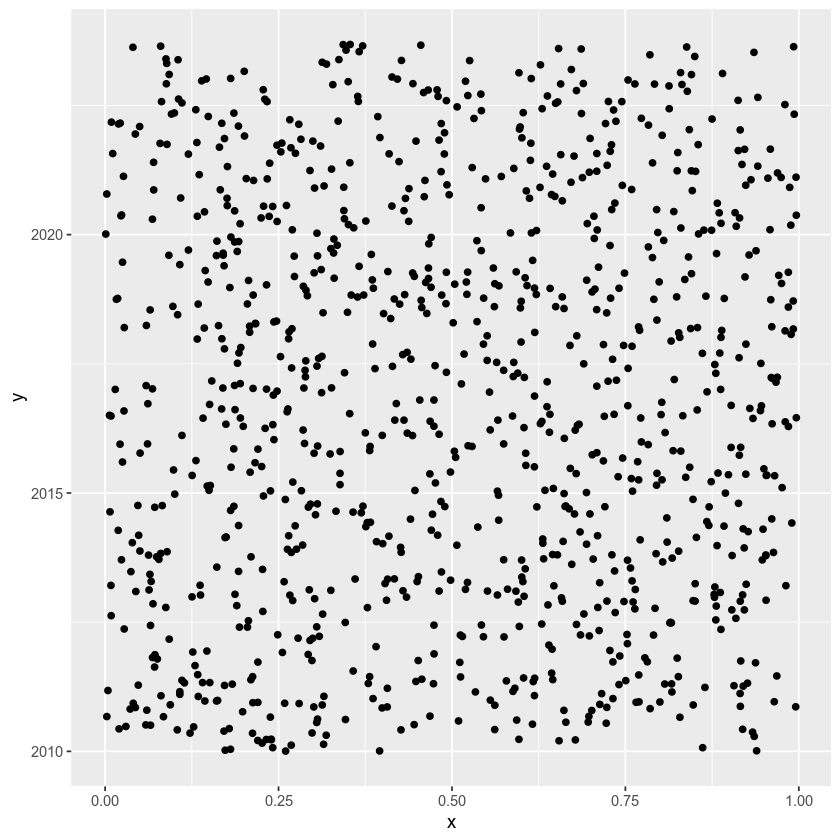

In [32]:
challenge %>%
drop_na() %>%
  ggplot(aes(x = x, y = y)) +
  geom_point()

Probably just noise...

## Your turn

Try to read some other csv file from the stats nz website we used before. Do you find any error? Can you solve it?

In [37]:
financial_ti <- "https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2018-financial-year-provisional/Download-data/annual-enterprise-survey-2018-financial-year-provisional-csv.csv"
finalcial_ti <- financial_ti %>% read_csv()

Parsed with column specification:
cols(
  Year = col_double(),
  Industry_aggregation_NZSIOC = col_character(),
  Industry_code_NZSIOC = col_character(),
  Industry_name_NZSIOC = col_character(),
  Units = col_character(),
  Variable_code = col_character(),
  Variable_name = col_character(),
  Variable_category = col_character(),
  Value = col_character(),
  Industry_code_ANZSIC06 = col_character()
)


## Out of R

You can read csvs, but you can also write them! The function is `write_csv()`.

In [ ]:
library(singer)

singer_locations %>%
  write_csv("singer_locations.csv")

In [ ]:
singer_from_file <- read_csv("singer_locations.csv")

In [ ]:
all_equal(singer_locations,singer_from_file)

All as expected. Let's try to break things ;-)

## CSV and its cousins

We mentioned at the beginning that comma separeted value files are part of a large community. `readr` has other functions (which behave very similarly) for the other members of the family: discover them by typing `read_` and then hitting the _tab_ key.

In [ ]:
read_

Use the syntax `?function` (where _function_ is the function you care about) to see what this other read_... functions are for.

# Advanced: excel

Excel files are not strictly separated files. If you are lucky they are, almost, an XML file: we will speak about them in the web as data labs and lectures. If you are not lucky, they are a mess.

Whether you are lucky or not depends on how the person who decided to write the excel file. If they decided to simply use it as a table, with one table per sheet, no fancy fonts, colors, or other embellishments, then you might be lucky. Otherwise, you are not.

In both cases, R has a variety of libraries to help you read and write excel files.

### lucky

The first one we see is [**readxl**](https://readxl.tidyverse.org/). It is installed when you install tidyverse, but it is not loaded by default. So you need to load it (in the usual way). We are straight reading from challenge.xslx (the same example as before, so do expect the same error. But more.

In [ ]:
library(readxl) # From Jenny Brian et al.

"challenge.xlsx" %>%
  read_excel() %>%
  glimpse() # Expect a lot of red!

WOW, that's a lot of error. Luckily, we know already how to solve. Don't we? It's again that error in guessing the type of columns.

In [ ]:
"challenge.xlsx" %>%
  read_excel(guess_max = 1001) %>%
  glimpse()

Much better.

`readxl` works well when the data is tabular, i.e. it resemble closely a csv file and you hit lucky.

### unlucky

If the original excel file is a glorious mess of colors, fonts, more than on table per sheet, and so on you may still be able to recover the information using [tidyxl](https://github.com/nacnudus/tidyxl). This one does not come with the tidyverse, and you need to install it.

In [ ]:
remotes::install_github("nacnudus/tidyxl")

Open the file "titanic.xlsx" with excel (or numbers or any other spreadsheet program) and look at its structure. Then open it with tidyxl. Instead of producing a table, every non-empty cell in the excel file is recorded with its address (row number and column letter in excel), the content, the colour, and all its information. Then it is up to you to use that information wisely :-) This is one of the most advanced areas of wrangling, it is so because spreadsheet offer a lot of freedom to users, and users use all that freedom to write data in very creative ways. Your task is often that of taming that creativity and producing a rigidly structured dataframe. It is hard job.

A good resource is this online free book by the developers of `tidyxl` (and `unpivotr`): https://nacnudus.github.io/spreadsheet-munging-strategies/

In [ ]:
library(tidyxl)
titanic <- xlsx_cells("titanic.xlsx")
titanic %>% glimpse()

If we want to look at the 1st row and ist content, we can operate on `titanic` (which is dataframe).

In [ ]:
titanic %>%
  slice(1) %>%
  glimpse()

The only non empty cell in the first row is the "C1" (row 1, col 3). It contains some characters. Let's extract its text.

In [ ]:
titanic %>%
  slice(1) %>%
  select(address,row,col,character)

### Your turn, try with another row and see what it contains.

In [ ]:
# your code here

If you want to become a excel-to-R ninja (which is quite a good idea, given the amount of valuable data sleeping in companies' excel files) read more. Similar project you may want to look into are [unpivotr](https://nacnudus.github.io/unpivotr/) and [jailbreaker](https://github.com/rsheets/jailbreakr).

## Write excel

If you ever want to write to an excel (maybe because your colleague do work just using excel and you are trying to bring smoothly them to R), [writexl](https://github.com/ropensci/writexl) is what you are looking for.

In [ ]:
remotes::install_github("ropensci/writexl")

The behaviour of its main function `write_xlsx()` is similar to `write_csv()`.

In [ ]:
library(writexl)
challenge %>% write_xlsx(path = "challenge2.xlsx")

In [ ]:
read_excel("challenge2.xlsx",
          guess_max = 1001) %>%
glimpse()